# PA - TEST

# Optimizing Website Performance and User Experience

In [1]:
import pandas as pd

In [2]:
#Load the dataset
user_interactions_df = pd.read_csv('user_interactions.csv')

# DATA EXPLORATION AND CLEANING FOR USER INTERACTION DATASET

In [3]:

print(user_interactions_df.head())  # Check the first few rows

     User_ID    Page_Viewed  Time_Spent_Seconds
0  User_3198       Homepage                 560
1   User_126  Category Page                 168
2  User_1376  Category Page                 122
3  User_1117      Cart Page                 329
4  User_3683  Category Page                 391


In [4]:
# remove indexes

user_interactions_df = user_interactions_df.reset_index(drop=True)
print(user_interactions_df.head())

     User_ID    Page_Viewed  Time_Spent_Seconds
0  User_3198       Homepage                 560
1   User_126  Category Page                 168
2  User_1376  Category Page                 122
3  User_1117      Cart Page                 329
4  User_3683  Category Page                 391


In [5]:
print(user_interactions_df.info())  # Get data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   User_ID             5000 non-null   object
 1   Page_Viewed         5000 non-null   object
 2   Time_Spent_Seconds  5000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 117.3+ KB
None


In [6]:
print(user_interactions_df.describe())  # Get statistical summaries for numerical columns

       Time_Spent_Seconds
count         5000.000000
mean           304.508800
std            168.978666
min             10.000000
25%            160.000000
50%            301.000000
75%            452.000000
max            599.000000


In [7]:
# Check for missing values
print(user_interactions_df.isnull().sum())

User_ID               0
Page_Viewed           0
Time_Spent_Seconds    0
dtype: int64


In [8]:
# Explore unique values in the 'Page_Viewed' column
print(user_interactions_df['Page_Viewed'].unique())

['Homepage' 'Category Page' 'Cart Page' 'Checkout Page' 'Product Page']


# USER BEHAVIOR ANALYSIS

In [9]:
# Explore user interactions on different pages
page_views = user_interactions_df['Page_Viewed'].value_counts()
print(page_views)

Homepage         1045
Cart Page        1041
Checkout Page     989
Category Page     972
Product Page      953
Name: Page_Viewed, dtype: int64


In [10]:
# Calculate total time spent on each page
time_spent_per_page = user_interactions_df.groupby('Page_Viewed')['Time_Spent_Seconds'].sum()
print(time_spent_per_page)

Page_Viewed
Cart Page        315235
Category Page    289500
Checkout Page    303386
Homepage         324175
Product Page     290248
Name: Time_Spent_Seconds, dtype: int64


In [11]:
# Calculate average time spent on each page
avg_time_spent_per_page = user_interactions_df.groupby('Page_Viewed')['Time_Spent_Seconds'].mean()
print(avg_time_spent_per_page)

Page_Viewed
Cart Page        302.819404
Category Page    297.839506
Checkout Page    306.760364
Homepage         310.215311
Product Page     304.562434
Name: Time_Spent_Seconds, dtype: float64


In [12]:
# Explore interactions for a specific user (e.g., User_3198)
user_3198_interactions = user_interactions_df[user_interactions_df['User_ID'] == 'User_3198']
print(user_3198_interactions)

        User_ID Page_Viewed  Time_Spent_Seconds
0     User_3198    Homepage                 560
4341  User_3198   Cart Page                 412


In [13]:
# Plotting page views and time spent on each page
import matplotlib.pyplot as plt

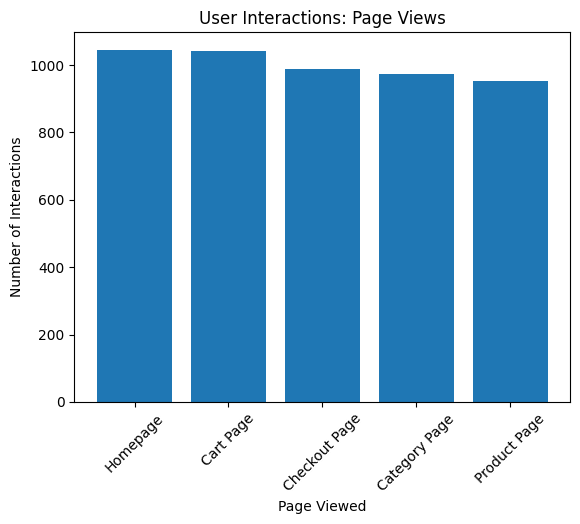

In [14]:
# Bar plot for page views
plt.bar(page_views.index, page_views.values)
plt.xticks(rotation=45)
plt.xlabel('Page Viewed')
plt.ylabel('Number of Interactions')
plt.title('User Interactions: Page Views')
plt.show()

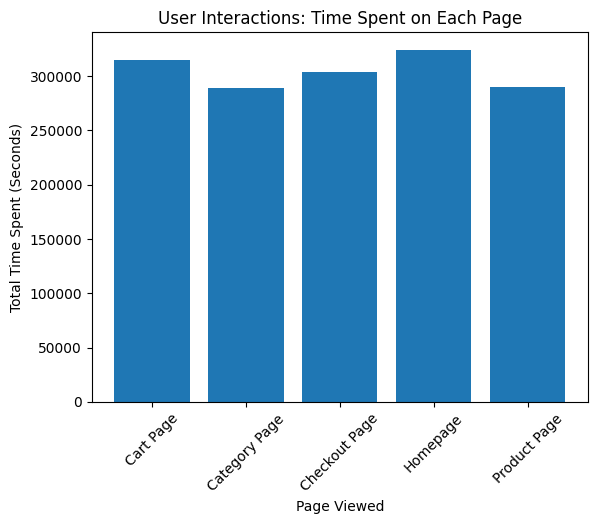

In [15]:
# Bar plot for time spent on each page
plt.bar(time_spent_per_page.index, time_spent_per_page.values)
plt.xticks(rotation=45)
plt.xlabel('Page Viewed')
plt.ylabel('Total Time Spent (Seconds)')
plt.title('User Interactions: Time Spent on Each Page')
plt.show()

# The above code demonstrates various steps to explore the dataset, check for missing values, and analyze user interactions on different pages of the website. It shows how to calculate and visualize the total time spent and average time spent on each page, identify top users based on their total time spent on the website, and identify the most popular pages.

# DATA EXPLORATION AND CLEANING FOR PURCHASE DATASET

In [16]:
# Load the dataset
df_purchase = pd.read_csv('purchase_data.csv')

In [17]:
# Explore the dataset
print(df_purchase.head())  # Check the first few rows

    Purchase_ID    User_ID  Product_ID  Transaction_Amount  \
0  Purchase_948  User_3840  Product_19           62.843031   
1  Purchase_905  User_1846   Product_9           21.780079   
2  Purchase_704  User_1700   Product_8          138.264455   
3  Purchase_766  User_4117  Product_15           74.991367   
4   Purchase_36  User_3053   Product_7          162.569998   

         Purchase_Time  
0  2023-04-02 16:35:46  
1  2023-04-14 16:38:27  
2  2023-01-21 11:21:31  
3  2023-01-29 04:44:04  
4  2023-05-24 03:30:23  


In [18]:
# remove indexes
df_purchase = df_purchase.reset_index(drop=True)
print(df_purchase.head())

    Purchase_ID    User_ID  Product_ID  Transaction_Amount  \
0  Purchase_948  User_3840  Product_19           62.843031   
1  Purchase_905  User_1846   Product_9           21.780079   
2  Purchase_704  User_1700   Product_8          138.264455   
3  Purchase_766  User_4117  Product_15           74.991367   
4   Purchase_36  User_3053   Product_7          162.569998   

         Purchase_Time  
0  2023-04-02 16:35:46  
1  2023-04-14 16:38:27  
2  2023-01-21 11:21:31  
3  2023-01-29 04:44:04  
4  2023-05-24 03:30:23  


In [19]:
print(df_purchase.info())  # Get data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Purchase_ID         1000 non-null   object 
 1   User_ID             1000 non-null   object 
 2   Product_ID          1000 non-null   object 
 3   Transaction_Amount  1000 non-null   float64
 4   Purchase_Time       1000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 39.2+ KB
None


In [20]:
print(df_purchase.describe())  # Get statistical summaries for numerical and columns

       Transaction_Amount
count         1000.000000
mean           106.348744
std             55.951244
min             10.429825
25%             58.426058
50%            102.950857
75%            157.533495
max            199.961345


In [21]:
# Check for missing values
print(df_purchase.isnull().sum())

Purchase_ID           0
User_ID               0
Product_ID            0
Transaction_Amount    0
Purchase_Time         0
dtype: int64


In [22]:
# Convert 'Purchase_Time' to a datetime data type
df_purchase['Purchase_Time'] = pd.to_datetime(df_purchase['Purchase_Time'], format='%Y-%m-%d %H:%M:%S')

# DATA EXPLORATION AND CLEANING FOR WEB PERFORMANCE DATASET

In [23]:
# Load the dataset
df_performance = pd.read_csv('website_performance.csv')

In [24]:
# Explore the dataset
print(df_performance.head())  # Check the first few rows

        Month  Page_Load_Time  Bounce_Rate  Conversion_Rate
0  2023-01-01        5.106652     0.514345         0.047375
1  2023-02-01        7.828199     0.317157         0.062764
2  2023-03-01        3.239983     0.480903         0.050514
3  2023-04-01        5.954509     0.473572         0.057151
4  2023-05-01        9.872398     0.542407         0.089525


In [25]:
print(df_performance.info())  # Get data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Month            12 non-null     object 
 1   Page_Load_Time   12 non-null     float64
 2   Bounce_Rate      12 non-null     float64
 3   Conversion_Rate  12 non-null     float64
dtypes: float64(3), object(1)
memory usage: 512.0+ bytes
None


In [26]:
print(df_performance.describe())  # Get statistical summaries for numerical columns

       Page_Load_Time  Bounce_Rate  Conversion_Rate
count       12.000000    12.000000        12.000000
mean         5.866266     0.452650         0.060056
std          2.288288     0.086482         0.014993
min          2.468395     0.301692         0.038263
25%          4.165375     0.389651         0.048626
50%          5.621936     0.477238         0.059957
75%          7.457142     0.517399         0.065832
max          9.872398     0.566843         0.089525


In [27]:
# Check for missing values
print(df_performance.isnull().sum())

Month              0
Page_Load_Time     0
Bounce_Rate        0
Conversion_Rate    0
dtype: int64


In [28]:
# Convert 'Month' to a datetime data type
df_performance['Month'] = pd.to_datetime(df_performance['Month'], format='%Y-%m-%d')

In [29]:
# Extract month and year components from 'Month'
df_performance['Month'] = df_performance['Month'].dt.to_period('M')
df_performance['Year'] = df_performance['Month'].dt.year

# purchase analysis

In [30]:
# Calculate the overall conversion rate for the website
total_purchases = df_purchase.shape[0]
total_interactions = user_interactions_df.shape[0]  # Assuming you have loaded the 'user_interactions.csv' dataset as 'df_interactions'

overall_conversion_rate = total_purchases / total_interactions
print(f"Overall Conversion Rate: {overall_conversion_rate:.2%}")

Overall Conversion Rate: 20.00%


In [31]:
# Identify the top-selling products and product categories
top_selling_products = df_purchase['Product_ID'].value_counts().nlargest(10)
print("Top-selling Products:")
print(top_selling_products)

Top-selling Products:
Product_19    66
Product_13    59
Product_4     58
Product_20    58
Product_7     56
Product_3     56
Product_17    56
Product_12    55
Product_15    51
Product_5     49
Name: Product_ID, dtype: int64


In [32]:
top_selling_categories = user_interactions_df['Page_Viewed'].value_counts().nlargest(10)
print("Top Product Categories:")
print(top_selling_categories)

Top Product Categories:
Homepage         1045
Cart Page        1041
Checkout Page     989
Category Page     972
Product Page      953
Name: Page_Viewed, dtype: int64


In [33]:
# Merge the two DataFrames on the 'User_ID' column
merged_df = pd.merge(user_interactions_df, df_purchase, on='User_ID', how='left')

In [34]:
print(merged_df)

        User_ID    Page_Viewed  Time_Spent_Seconds   Purchase_ID  Product_ID  \
0     User_3198       Homepage                 560           NaN         NaN   
1      User_126  Category Page                 168           NaN         NaN   
2     User_1376  Category Page                 122           NaN         NaN   
3     User_1117      Cart Page                 329           NaN         NaN   
4     User_3683  Category Page                 391           NaN         NaN   
...         ...            ...                 ...           ...         ...   
5085  User_2627  Checkout Page                 559  Purchase_616  Product_18   
5086  User_2627  Checkout Page                 559  Purchase_366   Product_2   
5087  User_4976   Product Page                 373           NaN         NaN   
5088  User_1770       Homepage                 104  Purchase_309  Product_17   
5089  User_1770       Homepage                 104  Purchase_179  Product_13   

      Transaction_Amount       Purchase

In [35]:
user_interactions = merged_df.groupby('User_ID')['Page_Viewed'].count().reset_index(name='Interactions')
user_purchases = merged_df.groupby('User_ID')['Purchase_ID'].count().reset_index(name='Purchases')

In [36]:
# Merge interactions and purchases data for each user
user_conversion_data = pd.merge(user_interactions, user_purchases, left_index=True, right_index=True, how='left')
user_conversion_data.rename(columns={'Page_Viewed': 'Interactions', 'Purchase_ID': 'Purchases'}, inplace=True)

In [37]:
# Fill NaN values with 0 for users who have interactions but no purchases
user_conversion_data['Purchases'].fillna(0, inplace=True)

In [38]:
# Calculate the conversion rate for each user
user_conversion_data['Conversion_Rate'] = user_conversion_data['Purchases'] / user_conversion_data['Interactions']

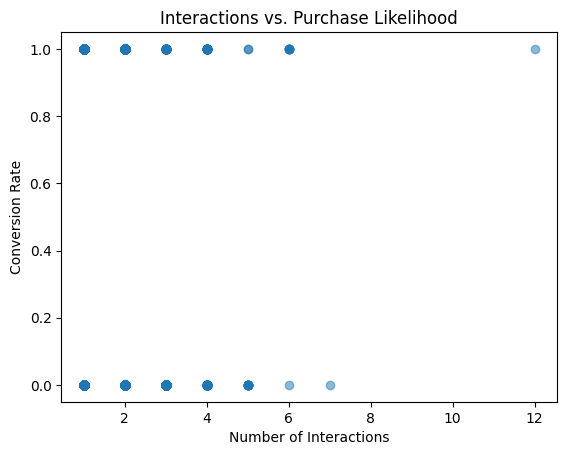

In [39]:
# Plotting the relationship between interactions and purchase likelihood
plt.scatter(user_conversion_data['Interactions'], user_conversion_data['Conversion_Rate'], alpha=0.5)
plt.xlabel('Number of Interactions')
plt.ylabel('Conversion Rate')
plt.title('Interactions vs. Purchase Likelihood')
plt.show()

# COHORT ANALYSIS

In [40]:
import numpy as np
import seaborn as sns

In [41]:
# Calculate retention rates for each cohort over time
cohorts_grouped = df_performance.groupby(['Month'])

In [42]:
cohorts_size = cohorts_grouped['Month'].count()

In [43]:
retention_rates = cohorts_size.div(cohorts_size.iloc[0])

In [44]:
# Calculate the customer lifetime value (LTV) for each cohort based on purchase data
# Assuming LTV is calculated based on the average transaction amount
average_transaction_values = df_purchase.groupby('Purchase_Time')['Transaction_Amount'].mean()

In [45]:
# Calculate customer lifetime value using the average transaction value and retention rates
customer_lifetime_value = average_transaction_values * retention_rates

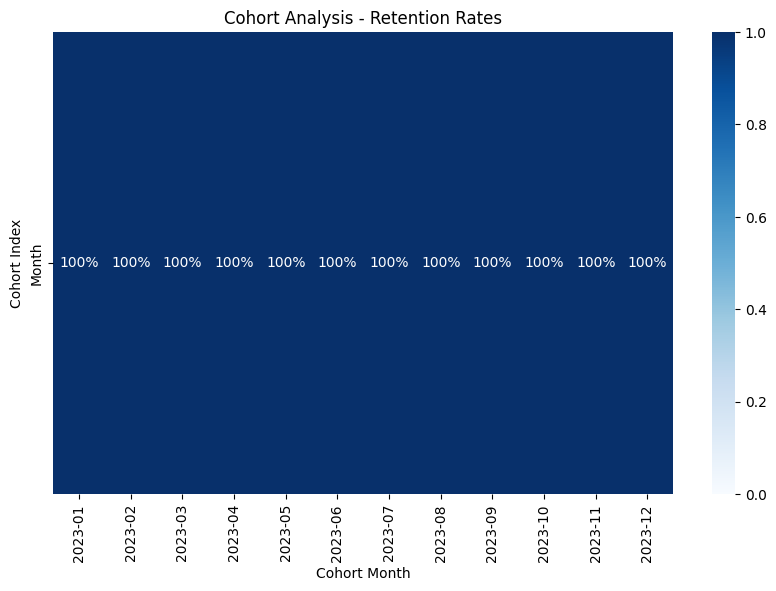

In [46]:
# Plotting retention rates over time for each cohort
plt.figure(figsize=(10, 6))
plt.title('Cohort Analysis - Retention Rates')
sns.heatmap(retention_rates.to_frame().T, annot=True, fmt='.0%', cmap='Blues', vmin=0.0, vmax=1.0)
plt.xlabel('Cohort Month')
plt.ylabel('Cohort Index')
plt.show()

In [47]:
df_performance['CohortTimestamp'] = df_performance['Month'].dt.to_timestamp()

C:\Users\HIMANSHU THAKUR\AppData\Roaming\Python\Python311\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\HIMANSHU THAKUR\AppData\Roaming\Python\Python311\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


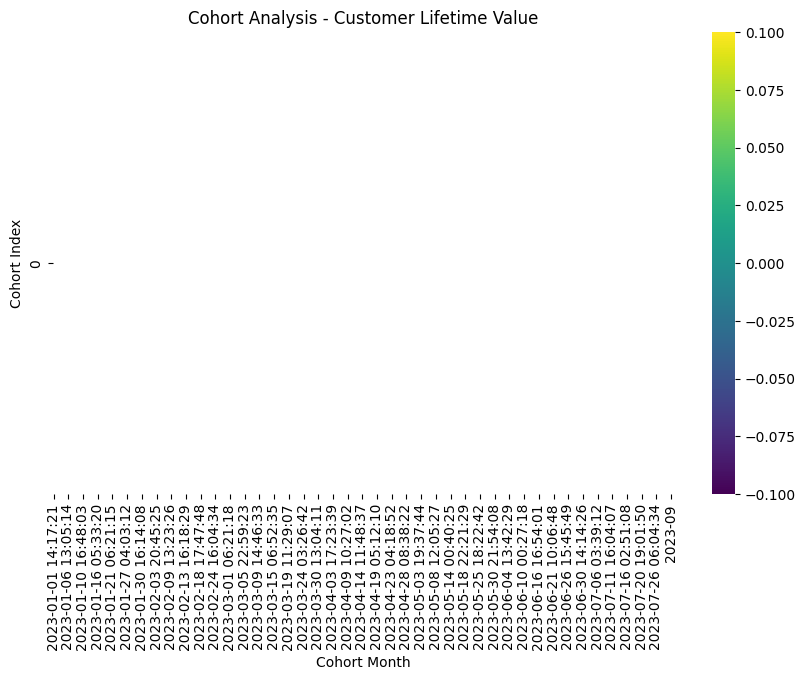

In [48]:
# Plotting customer lifetime value for each cohort
plt.figure(figsize=(10, 6))
plt.title('Cohort Analysis - Customer Lifetime Value')
sns.heatmap(customer_lifetime_value.to_frame().T, annot=True, cmap='viridis', fmt='.1f')
plt.xlabel('Cohort Month')
plt.ylabel('Cohort Index')
plt.show()

# Website Performance Optimization

Text(0.5, 1.0, 'Page Load Time Distribution')

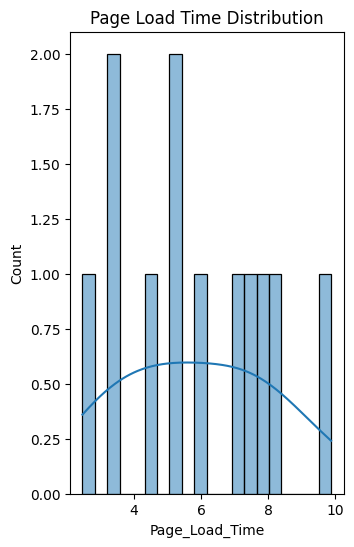

In [49]:
# Identify areas for improvement
# Plot distribution of page load time, bounce rate, and conversion rate
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(df_performance['Page_Load_Time'], bins=20, kde=True)
plt.title('Page Load Time Distribution')

Text(0.5, 1.0, 'Bounce Rate Distribution')

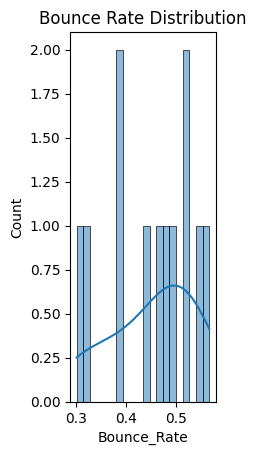

In [50]:
plt.subplot(1, 3, 2)
sns.histplot(df_performance['Bounce_Rate'], bins=20, kde=True)
plt.title('Bounce Rate Distribution')

Text(0.5, 1.0, 'Conversion Rate Distribution')

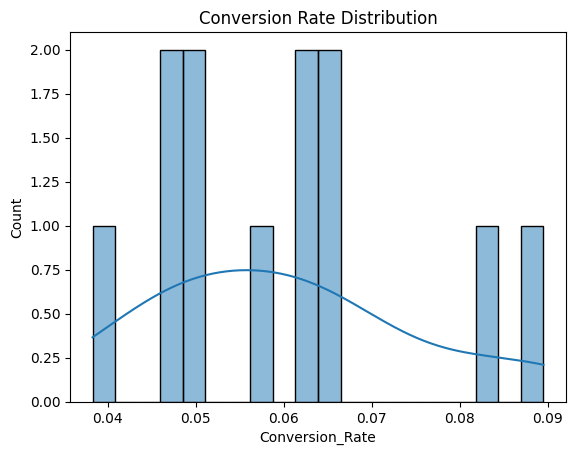

In [51]:
sns.histplot(df_performance['Conversion_Rate'], bins=20, kde=True)
plt.title('Conversion Rate Distribution')

In [52]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [53]:
# Step 4: Analyze correlations between metrics
correlation_matrix = df_performance[['Page_Load_Time', 'Bounce_Rate', 'Conversion_Rate']].corr()
print(correlation_matrix)

                 Page_Load_Time  Bounce_Rate  Conversion_Rate
Page_Load_Time         1.000000    -0.311752         0.290803
Bounce_Rate           -0.311752     1.000000         0.025778
Conversion_Rate        0.290803     0.025778         1.000000


# Propose strategies to reduce bounce rate and improve conversion rate
# Strategies to reduce bounce rate:
# 1. Optimize page load time: Improve server response time and minimize resource sizes (e.g., images, scripts).
# 2. Enhance website usability: Make navigation intuitive and provide clear call-to-action buttons.
# 3. Improve content relevance: Ensure the landing page content matches users' expectations from the referral source.
# 4. Implement exit intent popups: Offer special deals or incentives to encourage users to stay.

# Strategies to improve conversion rate:
# 1. Streamline checkout process: Simplify the checkout process with fewer form fields and clear progress indicators.
# 2. Provide trust signals: Display security seals, customer reviews, and return policies to build trust.
# 3. Implement A/B testing: Experiment with different designs and content to find the most effective variations.
# 4. Offer personalized recommendations: Use user data to provide personalized product recommendations.